In [1]:
####################################################
## Exploratory Data Analysis of NOLA Police Calls ##
## @brett | 09-05-2021                            ##
####################################################

# Getting Data Ready

In [85]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Change some settings
pd.options.display.max_rows = 999

# Import Data
last_year = pd.read_csv('./../data/Calls_for_service_2020.csv')
this_year = pd.read_csv('./../data/Calls_for_service_2021.csv')

# Merge into one dataset
data = this_year.append(last_year).reset_index().drop('index',axis=1)

In [86]:
# This cleans the date, if there is no date there, I fill in a date from 1900 so that I can easily filter it out
def clean_date(s):
    try:
        return(datetime.strptime(s,'%m/%d/%Y %I:%M:%S %p'))
    except:
        return(None)

In [87]:
# Let's clean up some of these fun timestamps
data['DateCreate'] = data['TimeCreate'].apply(lambda x: datetime.strptime(x[:10],'%m/%d/%Y'))
data['TimeCreate'] = data['TimeCreate'].apply(lambda x: clean_date(x))
data['TimeDispatch'] = data['TimeDispatch'].apply(lambda x: clean_date(x))
data['TimeArrive'] = data['TimeArrive'].apply(lambda x: clean_date(x))
data['TimeClosed'] = data['TimeClosed'].apply(lambda x: clean_date(x))

# Checking The Data
Some example questions of things I might want to check out:
* What's the distribution of calls per date?
* What types of calls can be made?
* What's the average response time? (overall and by type of incident? and by priority?)
* What are the counts of disposition?
* What does self initiated look like?
* What does Beat mean?

In [90]:
# Seeing what my representation of dates looks like, do I have all of them?
data['DateCreate'].value_counts()

2020-02-22    1534
2020-02-23    1528
2020-09-15    1502
2020-06-08    1477
2020-10-28    1463
2021-05-14    1437
2020-05-19    1422
2020-02-04    1419
2020-02-25    1415
2021-04-08    1412
2020-10-10    1408
2020-10-29    1406
2020-07-04    1405
2020-09-14    1401
2021-02-13    1388
2020-02-21    1387
2020-01-14    1380
2021-04-27    1379
2021-05-27    1371
2021-05-28    1368
2021-05-11    1363
2021-05-12    1362
2020-02-24    1358
2021-05-25    1355
2020-06-16    1354
2021-06-28    1354
2021-04-09    1353
2020-01-28    1353
2021-05-18    1348
2020-05-12    1342
2020-01-31    1342
2021-05-20    1341
2021-04-15    1340
2021-04-05    1340
2021-05-04    1338
2020-01-29    1335
2021-03-31    1333
2020-09-01    1332
2021-05-07    1332
2021-03-09    1329
2021-04-13    1329
2020-06-10    1327
2021-04-01    1327
2020-08-24    1326
2020-01-01    1324
2020-01-09    1323
2020-11-11    1323
2021-05-13    1322
2020-02-03    1322
2021-04-06    1319
2020-03-11    1318
2021-04-29    1317
2020-05-05  

In [91]:
data['DateCreate'].max() - data['DateCreate'].min()

Timedelta('612 days 00:00:00')

<AxesSubplot:xlabel='DateCreate', ylabel='Count'>

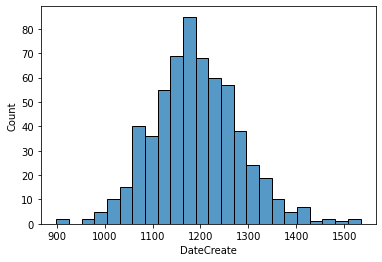

In [92]:
# Yep! I have all the dates. Now let's see the distribution of the dates
sns.histplot(data=pd.DataFrame(data['DateCreate'].value_counts()), x="DateCreate")

I wonder what happened on those days with 1500+. Is it just natural variation? Similarly wonder on that day of only 900? Overall, looks like a pretty normal distribution with as much variation as I would expect.

If I make any visuals and want to categorize by color for type of incident, I can only ever visualize so many of the types. If I do the top X, how many make sense? Top 9 get me ~68%. So I will just do Top 9 + Other and group all the others

In [93]:
type_summary = pd.DataFrame(data.TypeText.value_counts()).reset_index()
type_summary.columns = ['Type', 'count']
type_summary['cumsum'] = type_summary['count'].cumsum()
type_summary['perc'] = type_summary['cumsum']/len(data) 
type_summary

,Type,count,cumsum,perc
0,AREA CHECK,176441,176441,0.241591
1,COMPLAINT OTHER,103158,279599,0.382840
2,DISTURBANCE (OTHER),43386,322985,0.442246
3,BUSINESS CHECK,40696,363681,0.497969
4,"BURGLAR ALARM, SILENT",31491,395172,0.541088
5,RETURN FOR ADDITIONAL INFO,24304,419476,0.574366
6,TRAFFIC STOP,22430,441906,0.605078
7,SUSPICIOUS PERSON,21565,463471,0.634606
8,AUTO ACCIDENT,18994,482465,0.660613
9,DOMESTIC DISTURBANCE,18553,501018,0.686017


In [94]:
arrivals = data[~data.TimeArrive.isna()]

In [98]:
def get_secs(a, d):
    try:
        return((a-d).seconds)
    except:
        return(None)

In [125]:
arrivals['response_seconds'] = arrivals.apply(lambda x: get_secs(x.TimeArrive,x.TimeDispatch),axis=1)

In [114]:
arrivals.secs_to_response.quantile(.95)

1235.0

<AxesSubplot:xlabel='response_seconds', ylabel='Count'>

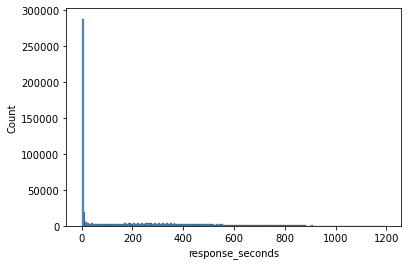

In [115]:
sns.histplot(data=arrivals[arrivals.response_seconds<1200], x="response_seconds")

<AxesSubplot:xlabel='response_seconds', ylabel='Count'>

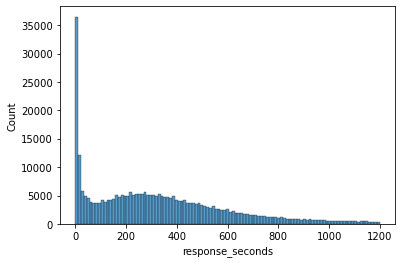

In [124]:
# Has a long tail. Checks out. Let's get rid of all those that are self initiated to get a better picture because it is being overloaded by 0 response times
sns.histplot(data=arrivals[(arrivals.response_seconds<1200) & (arrivals.SelfInitiated=='N')], x="response_seconds")

95% of calls have police arriving in 20 minutes (<1200s)? That seems pretty good to me 

In [126]:
# Does priority actually determine response time?
arrivals.Priority.value_counts()

1K    217896
1J    104017
2C     50316
1A     44854
2D     33401
1C     29107
1I     28688
2A     23085
1G     22249
0A     20833
2E     20330
1E     17561
1F      9454
1D      6768
1H      4323
0G      2756
2F      1945
0I       360
2J       355
1B       176
2B        75
0C        61
0H        12
3C        12
0Z         9
1Z         9
2H         4
1L         3
2G         3
1N         2
0F         1
0Y         1
1M         1
1O         1
1R         1
2          1
3A         1
4A         1
0D         1
2Q         1
Name: Priority, dtype: int64

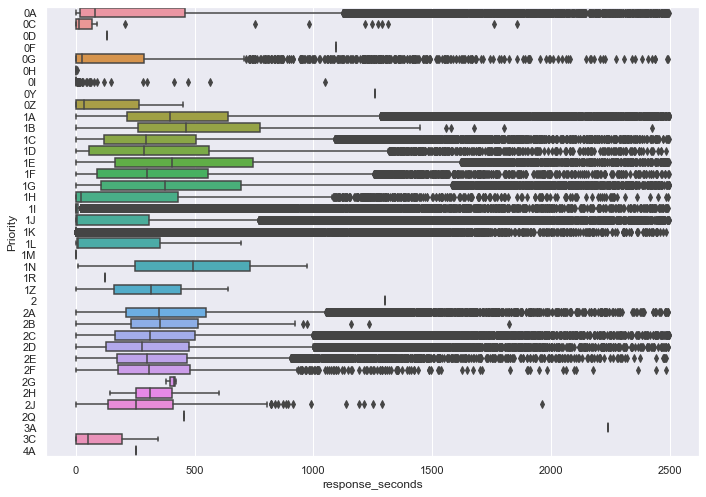

In [143]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="response_seconds", y="Priority", data=arrivals[arrivals.response_seconds<2500].sort_values('Priority'))

I don't think I am really able to distinguish between 

Which types of things don't police arrive to?

datetime.datetime(2021, 1, 1, 0, 1, 28)

In [48]:
arrivalarrivals.TimeArrive.apply(lambda x: datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))

0        2021-01-01 00:01:28
1        2021-01-01 03:43:58
2        2021-01-01 00:01:47
5        2021-01-01 00:02:37
7        2021-01-01 00:59:57
                 ...        
730323   2020-12-31 15:43:12
730324   2020-12-31 03:19:51
730326   2020-12-31 07:52:27
730327   2020-12-31 21:58:44
730328   2020-12-31 20:23:38
Name: TimeArrive, Length: 638674, dtype: datetime64[ns]

In [ ]:
arrivals.

In [41]:
time_to_arrival = 

0         01/01/2021 12:01:28 AM
1         01/01/2021 03:43:58 AM
2         01/01/2021 12:01:47 AM
3                            NaN
4                            NaN
                   ...          
730324    12/31/2020 03:19:51 AM
730325                       NaN
730326    12/31/2020 07:52:27 AM
730327    12/31/2020 09:58:44 PM
730328    12/31/2020 08:23:38 PM
Name: TimeArrive, Length: 730329, dtype: object

In [39]:
data['TimeDispatch'] = 

,NOPD_Item,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,...,TimeClosed,Disposition,DispositionText,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,DateCreate
0,A0000221,22A,AREA CHECK,1K,22A,AREA CHECK,1K,3668804,546585,01/01/2021 12:01:28 AM,...,01/01/2021 12:40:31 AM,NAT,Necessary Action Taken,Y,3I04,Vicksburg St & Brooks St,70124,3,POINT (-90.10764787 29.99729994),2021-01-01
1,A0000321,62A,"BURGLAR ALARM, SILENT",1A,62A,"BURGLAR ALARM, SILENT",2E,3673216,521932,01/01/2021 12:01:34 AM,...,01/01/2021 03:51:24 AM,NAT,Necessary Action Taken,N,6Q02,036XX Baronne St,70115,6,POINT (-90.09455243 29.92938301),2021-01-01
2,A0000421,22A,AREA CHECK,1K,22A,AREA CHECK,1K,3682049,530554,01/01/2021 12:01:47 AM,...,01/01/2021 03:03:53 AM,NAT,Necessary Action Taken,Y,8B01,Decatur St & Iberville St,None,8,POINT (-90.06636912 29.95282347),2021-01-01
3,A0000521,94F,FIREWORKS,1A,94F,FIREWORKS,2J,3704326,518525,01/01/2021 12:02:13 AM,...,01/01/2021 12:17:36 AM,VOI,VOID,N,4D02,055XX Sutton Pl,70131,4,POINT (-89.9964721 29.91905338),2021-01-01
4,A0000621,94,DISCHARGING FIREARM,1A,94,DISCHARGING FIREARM,2D,3702356,554005,01/01/2021 12:02:14 AM,...,01/01/2021 07:08:48 AM,NAT,Necessary Action Taken,N,7E01,Lonely Oak Dr & Selma St,70126,7,POINT (-90.00138771 30.01667289),2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730324,L3712720,22A,AREA CHECK,1K,22A,AREA CHECK,1K,3668242,545430,12/31/2020 03:19:51 AM,...,12/31/2020 03:55:26 AM,NAT,Necessary Action Taken,Y,3E01,Canal Blvd & Florida Blvd,70124,3,POINT (-90.10946298 29.99414031),2020-12-31
730325,L3787720,94F,FIREWORKS,2J,94F,FIREWORKS,2J,3669009,537961,12/31/2020 06:48:06 PM,...,12/31/2020 06:48:54 PM,NAT,Necessary Action Taken,N,3D02,044XX Baudin St,70119,3,POINT (-90.10729416 29.97357998),2020-12-31
730326,L3698820,21,COMPLAINT OTHER,1A,21,COMPLAINT OTHER,1J,3669800,525664,12/31/2020 12:10:51 AM,...,12/31/2020 08:46:59 AM,GOA,GONE ON ARRIVAL,N,2N03,045XX S Claiborne Ave,70115,2,POINT (-90.10521219 29.93974579),2020-12-31
730327,L3802620,GATHER,PUBLIC GATHERING,1E,GATHER,PUBLIC GATHERING,1E,3668192,553134,12/31/2020 08:40:46 PM,...,12/31/2020 10:12:08 PM,NAT,Necessary Action Taken,N,3F02,068XX Louisville St,70124,3,POINT (-90.10936061 30.01532499),2020-12-31
